# Amazon Stock Prediction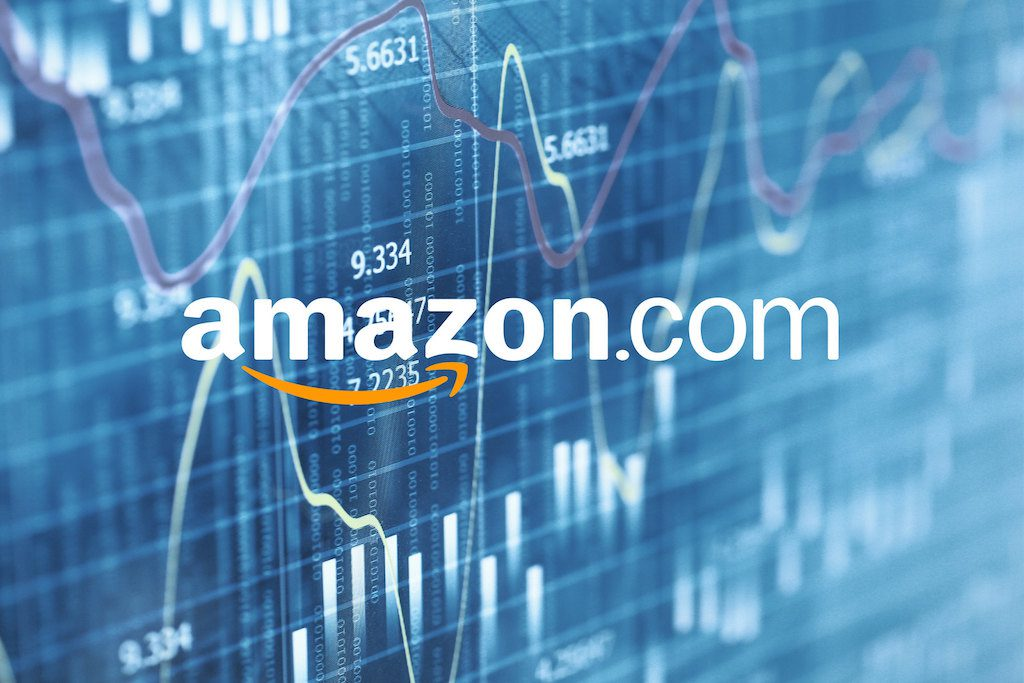

In [2]:
#panda technical analysis
!pip install pandas_ta -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 988.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!pip install mplfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


# Importing Necessary Libraries

In [4]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf #matplotlib finance
import seaborn as sns
import yfinance as yf
import pandas_ta as ta # for technical analysis

from keras.models import Sequential
from keras.layers import *

In [5]:
df = yf.download(tickers='AMZN', start = '2018-11-20', end = '2023-12-20')
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000
2018-11-21,77.149498,77.500000,75.750000,75.836502,75.836502,114336000
2018-11-23,75.849998,76.809998,75.090500,75.102997,75.102997,54152000
2018-11-26,76.949997,79.240501,76.210999,79.066498,79.066498,125154000
2018-11-27,78.799500,79.882500,77.900497,79.070999,79.070999,115664000
2018-11-28,80.695999,84.072502,80.060997,83.887497,83.887497,169174000
2018-11-29,83.749496,84.499496,82.616501,83.678497,83.678497,132264000
2018-11-30,83.974998,84.800003,83.324997,84.508499,84.508499,115236000
2018-12-03,88.473000,88.917000,86.500000,88.617996,88.617996,137246000


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58400800
2023-12-15,148.380005,150.570007,147.880005,149.970001,149.970001,110039100
2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62512800
2023-12-19,154.399994,155.119995,152.690002,153.789993,153.789993,43171300


# Visualising Stocks

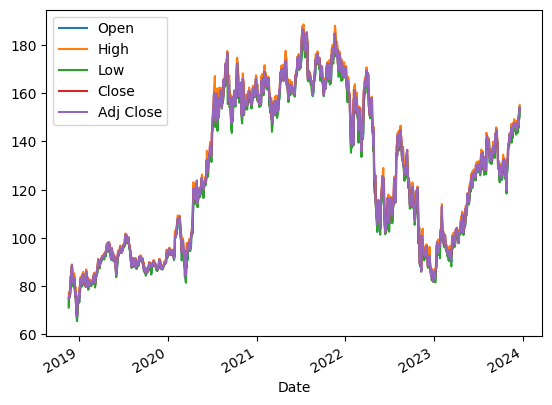

In [7]:
df.iloc[:,:-1].plot()
plt.show()

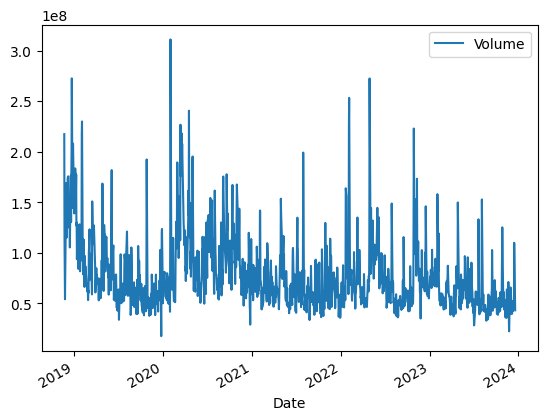

In [8]:
df.iloc[:,-1].plot()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


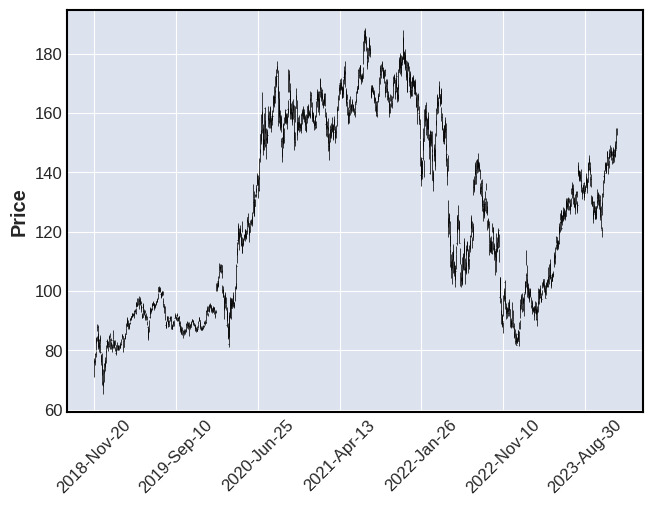

In [9]:
mpf.plot(df)

# OHLC Chart (Open,High,Low,Close data):

<ipython-input-10-0600b1a52a16>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(df['2020-03'], volume = True)


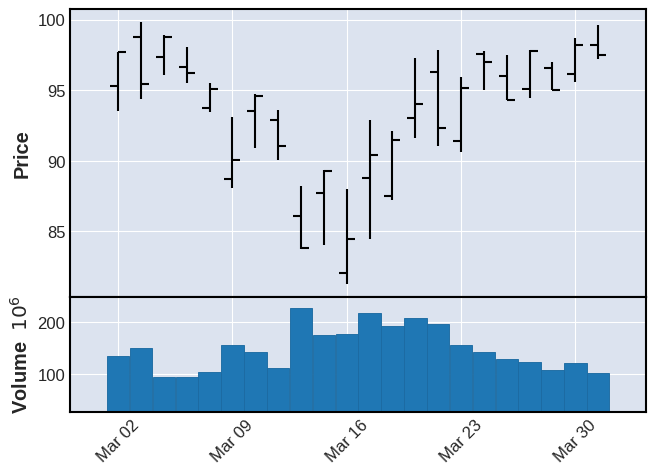

In [10]:
mpf.plot(df['2020-03'], volume = True)

# Candle Stick Chart for March 2020

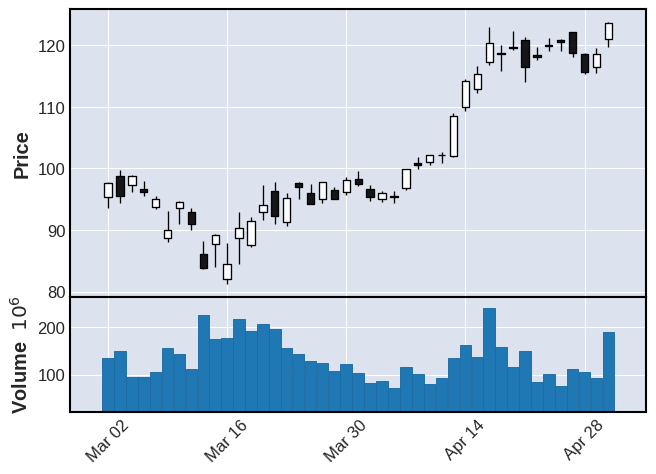

In [11]:
mpf.plot(df['2020-03':'2020-04'], type ='candle', volume = True )

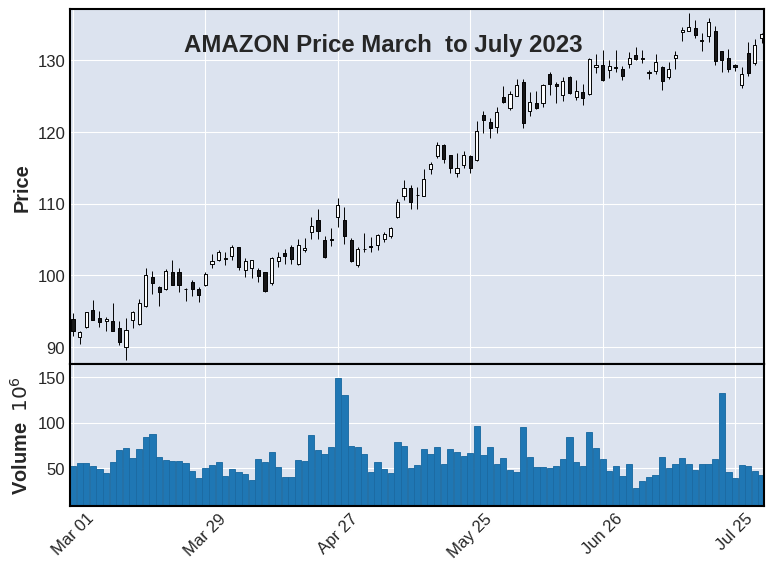

In [12]:
mpf.plot(df['2023-03':'2023-07'], type='candle',
         title= 'AMAZON Price March  to July 2023',
         volume = True, tight_layout = True)

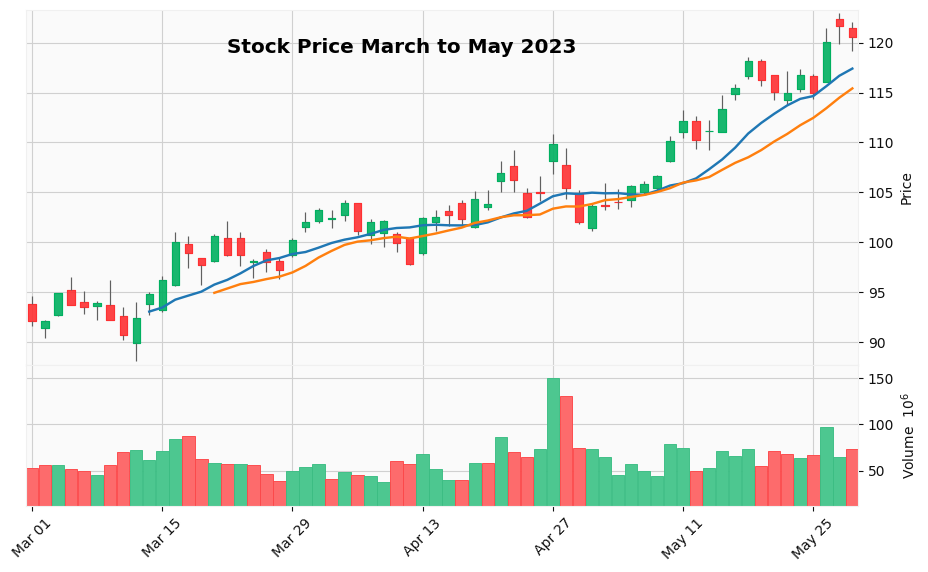

In [13]:
mpf.plot(df['2023-03':'2023-05'],
         figratio=(10,6), type = 'candle',
         title = 'Stock Price March to May 2023',
         mav=(10,15),
         #ema=(10),
         volume = True,
         tight_layout = True, style = 'yahoo')

# Adding some Technical Indicator to the data

**Relative Strength Index (RSI):**
Measures the speed and change of price movements, indicating overbought or oversold conditions.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\text{RSI} = 100 - \frac{100}{1 + \frac{\text{Average Gain}}{\text{Average Loss}}}$


Readings below 30 generally indicate that the stock is oversold, while readings above 70 indicate that it is overbought.

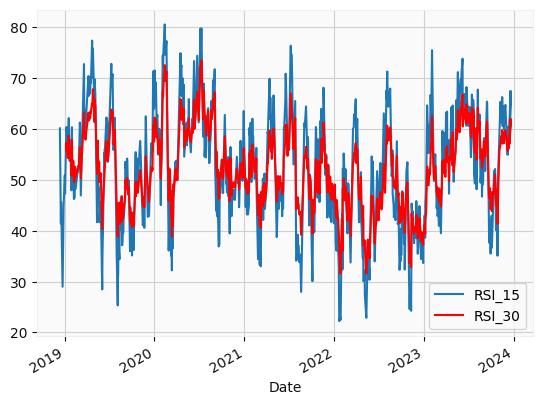

In [14]:
#calculates the RSI with a lookback period of 15.
RSI_15 = ta.rsi(df.Close, length=15)
RSI_30 = ta.rsi(df.Close, length=30)
RSI_15.plot()
RSI_30.plot(color = 'red')
plt.legend()
plt.show()

In [15]:
df['RSI'] = ta.rsi(df.Close, length=15)

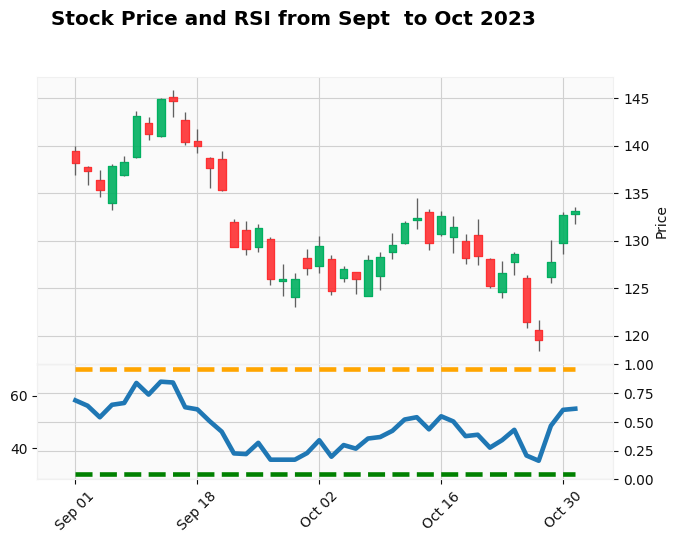

In [16]:
mpf.plot(df['2023-09':'2023-10'], type='candle', style='yahoo',
         title= 'Stock Price and RSI from Sept  to Oct 2023',
         addplot=[mpf.make_addplot(df['RSI']['2023-09':'2023-10'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df['2023-09':'2023-10']), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df['2023-09':'2023-10']), panel=1, secondary_y=True, color='green', linestyle='--')
                  ])

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


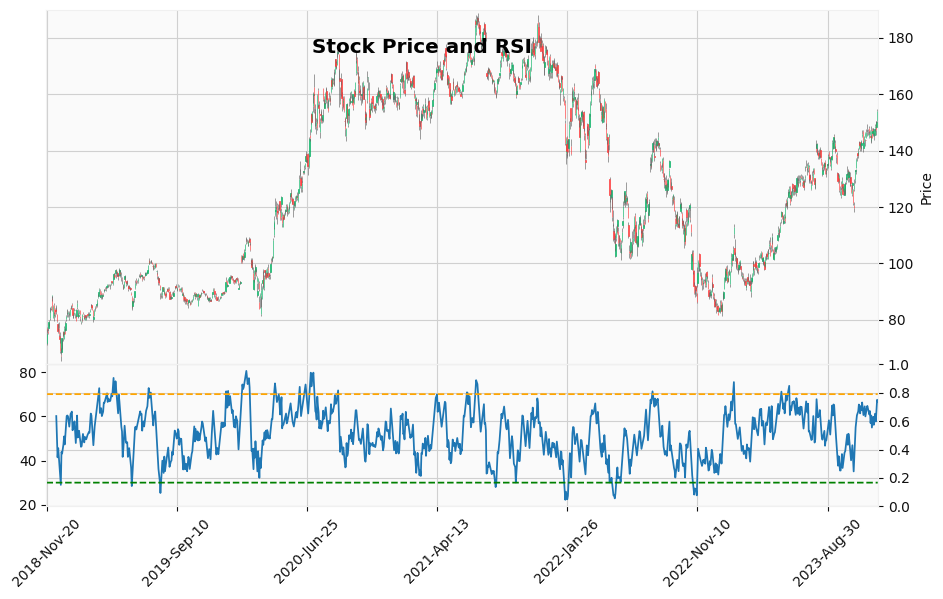

In [17]:
fig, ax = mpf.plot(df, type='candle', style='yahoo', figratio=(5,3),
         title= 'Stock Price and RSI', tight_layout = True,
         addplot=[mpf.make_addplot(df['RSI'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df), panel=1, secondary_y=True, color='g', linestyle='--')],
        returnfig = True
                   )
ax[1].annotate('Overbought', xy=(df.index[-1], 70), xytext=(df.index[-1], 70), textcoords='offset points',
                  color='r', ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

ax[1].annotate('Oversold', xy=(df.index[-1], 30), xytext=(df.index[-1], 30),  textcoords='offset points',
                  color='r', ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

mpf.show()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


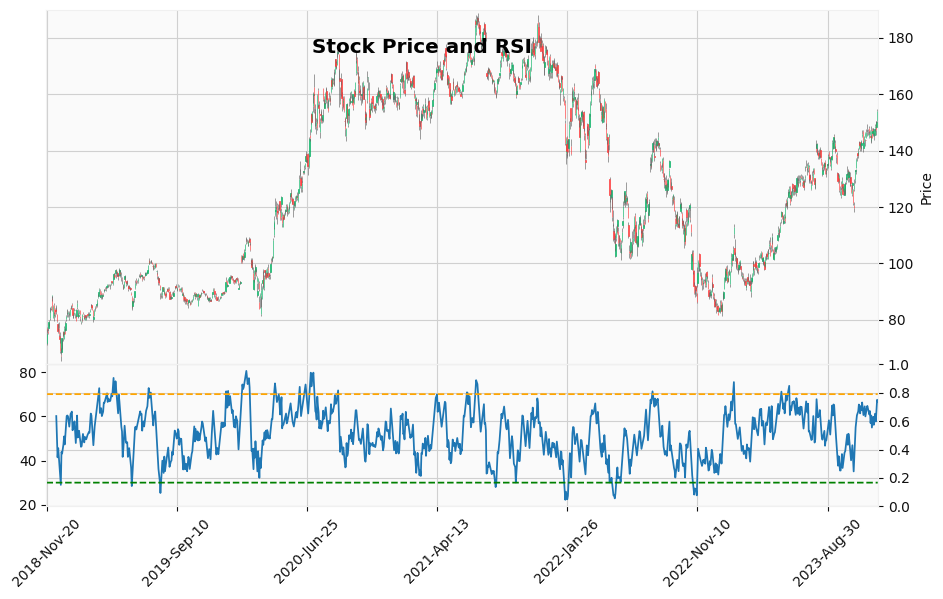

In [18]:
fig, ax = mpf.plot(df, type='candle', style='yahoo', figratio=(5,3),
         title= 'Stock Price and RSI', tight_layout = True,
         addplot=[mpf.make_addplot(df['RSI'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df), panel=1, secondary_y=True, color='g', linestyle='--')],
        returnfig = True
                   )
ax[1].annotate('Overbought', xy=(df.index[-1], 70), xytext=(df.index[-1], 70), textcoords='offset points',
                  color='r', ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

ax[1].annotate('Oversold', xy=(df.index[-1], 30), xytext=(df.index[-1], 30),  textcoords='offset points',
                  color='r', ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

mpf.show()

**EMAF (Exponential Moving Average - Fast)**: EMAs give more weight to recent prices, making them more responsive to recent changes.

In [19]:
#calculates the EMA with a smoothing period of 20.
df['EMAF']= ta.ema(df.Close, length=20)

**EMAM (Exponential Moving Average - Medium)**: This calculates another EMA for the 'Close' prices, but with a longer time period compared to EMAF. It's often referred to as a medium-term EMA.

In [20]:
# calculates the EMA with a smoothing period of 100.
df['EMAM']=ta.ema(df.Close, length=100)

**EMAS (Exponential Moving Average - Slow)**: This calculates yet another EMA for the 'Close' prices, with an even longer time period. It's often referred to as a slow or long-term EMA.

In [21]:
# calculates the EMA with a smoothing period of 150.
df['EMAS']=ta.ema(df.Close, length=200)

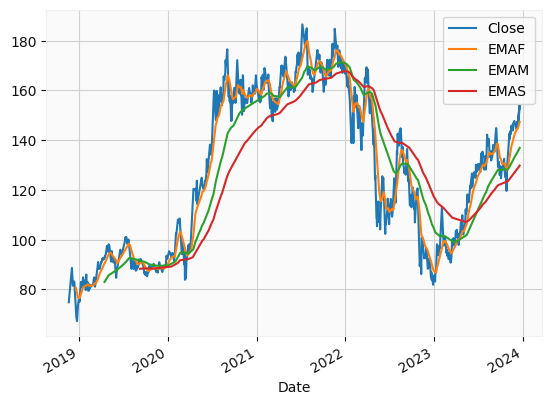

In [22]:
df['Close'].plot()
df['EMAF'].plot()
df['EMAM'].plot()
df['EMAS'].plot()
plt.legend()

**Intraday Price Movement:**

The difference between the opening and adjusted closing prices provides insight into how much the price of a financial instrument has moved within a single trading day. It gives you a sense of intraday volatility.

**Market Sentiment:** Positive values (df['Adj Close'] > df['Open']) suggest that the closing price was higher than the opening price, potentially indicating positive market sentiment or buying pressure during the day. Negative values (df['Adj Close'] < df['Open']) suggest that the closing price was lower than the opening price, potentially indicating negative market sentiment or selling pressure during the day.



In [23]:
df['Target'] = df['Adj Close']- df['Open']
df['Target'] = df['Target'].shift(-1)

**Shifted Close Price:**

In [24]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)

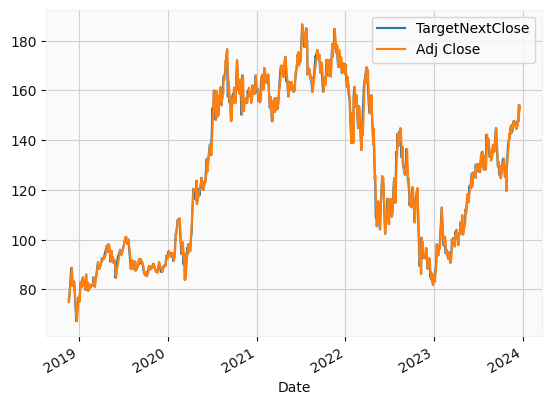

In [25]:
df['TargetNextClose'].plot()
df['Adj Close'].plot()
plt.legend()

<Axes: xlabel='Date'>

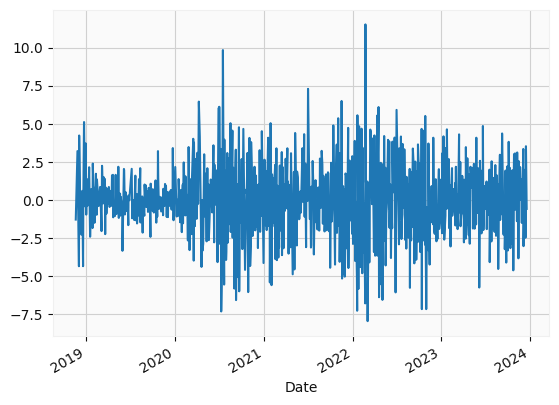

In [26]:
df['Target'].plot()

In [27]:
df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

* Positive values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 1

- Negative values (df['Adj Close'] > df['Open']) corresponds to TargetClass = 0

<Axes: ylabel='TargetClass'>

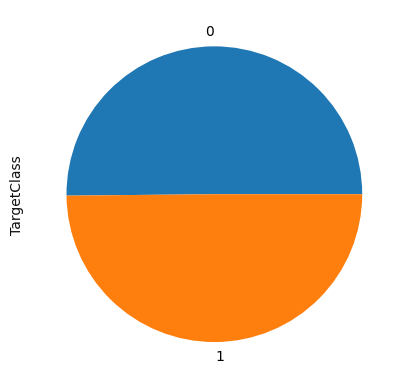

In [28]:
df['TargetClass'].value_counts().plot(kind='pie', )

In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
Date,,,,,,,,,,,,,
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200,61.151697,145.261001,135.676312,128.889978,-2.509995,147.419998,0
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58400800,57.626274,145.466620,135.908860,129.074356,1.589996,149.970001,1
2023-12-15,148.380005,150.570007,147.880005,149.970001,149.970001,110039100,61.857165,145.895513,136.187299,129.282273,3.510010,154.070007,1
2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62512800,67.455070,146.674036,136.541412,129.528917,-0.610001,153.789993,0
2023-12-19,154.399994,155.119995,152.690002,153.789993,153.789993,43171300,66.738355,147.351746,136.882968,129.770321,NaN,NaN,0


#**Components of TSA**

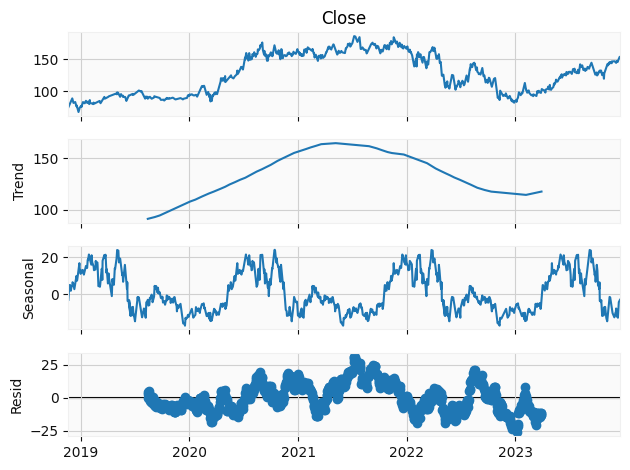

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df.Close, period=365)
decompose.plot()
plt.show()

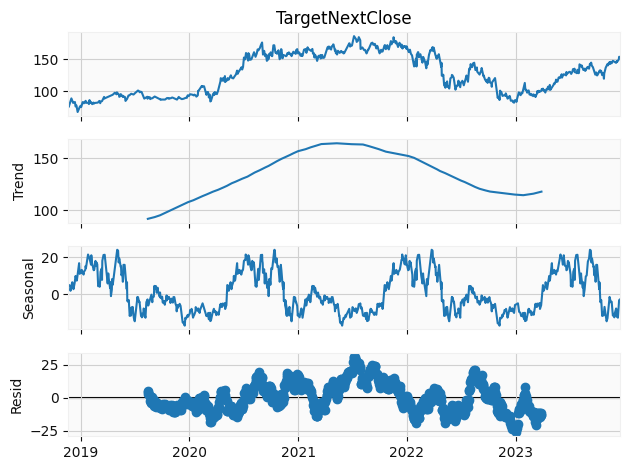

In [31]:
decompose = seasonal_decompose(df.TargetNextClose.dropna(), period=365)
decompose.plot()
plt.show()

# **Augmented Dicker Fuller(ADFuller) Test for checking stationarity**

In [32]:
from statsmodels.tsa.stattools import adfuller
def adfuller_prob(df,col):
  ts= df[col].dropna()
  ts_prob = adfuller(ts)[1]
  print(f'Probability is {ts_prob}')
  if ts_prob < 0.05:
    print('TS is stationary')
  else:
    print(f'TS = {col} is non-stationary')
    ts1 = df[col].diff().dropna()
    ts1_prob = adfuller(ts1)[1]
    print(f'Probability of 1st difference is {ts1_prob}')
    if ts1_prob < 0.05:
      print(f'TS[col] of diff1 is stationary')

adfuller_prob(df,col = 'Close')

Probability is 0.3328511209208669
TS = Close is non-stationary
Probability of 1st difference is 0.0
TS[col] of diff1 is stationary


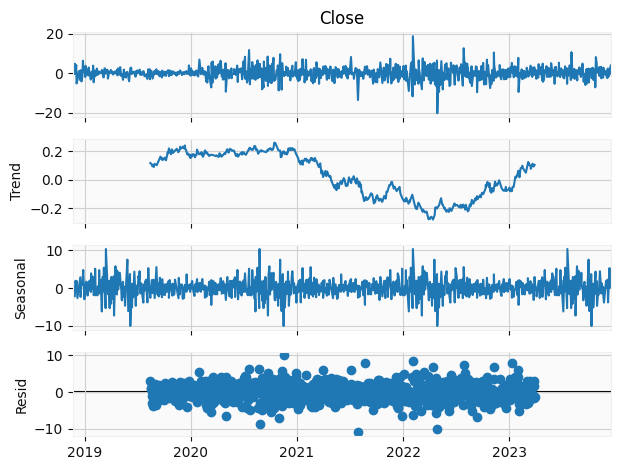

In [33]:
seasonal_decompose(df.Close.diff().dropna(), period=365).plot()
plt.show()

In [34]:
adfuller_prob(df, col='Target')


Probability is 0.0
TS is stationary


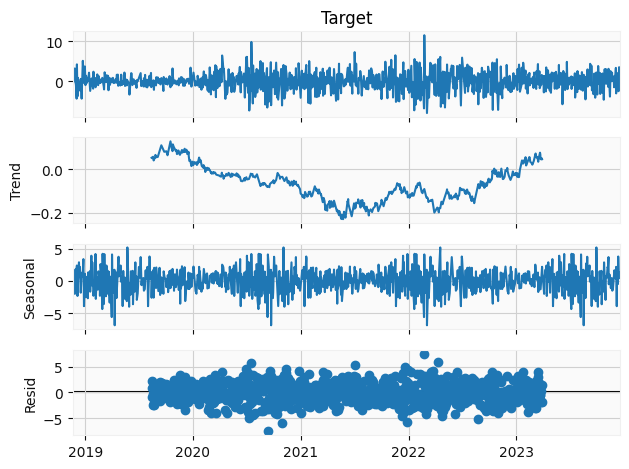

In [35]:
seasonal_decompose(df.Target.dropna(), period=365).plot()
plt.show()

In [36]:
df1 = df.dropna(inplace = True)
df1 = df.reset_index()
df1 = df1.drop(['Volume','Close'],axis=1)
pd.set_option('display.max_columns', None)
df1.head()

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
0,2019-09-09,92.050003,92.500000,91.230499,91.567497,51.900812,90.527643,91.512117,88.261617,-0.110001,91.027496,0
1,2019-09-10,91.137497,91.290497,90.266998,91.027496,49.922949,90.575249,91.502520,88.289139,0.542496,91.149498,1
2,2019-09-11,90.607002,91.670998,90.454002,91.149498,50.380677,90.629939,91.495530,88.317600,0.295998,92.177498,1
3,2019-09-12,91.881500,92.682999,91.713997,92.177498,54.163134,90.777326,91.509034,88.356007,-0.133499,91.967003,0
4,2019-09-13,92.100502,92.306000,91.758499,91.967003,53.272220,90.890628,91.518103,88.391937,-0.808998,90.391998,0


In [37]:
df1.Date.tail(1)

1077   2023-12-18
Name: Date, dtype: datetime64[ns]

In [38]:
last_date = df1.Date.tail(1).values
print('Last Date =',last_date)

Last Date = ['2023-12-18T00:00:00.000000000']


In [39]:
df1.shape

(1078, 12)

In [40]:
#excluding date and target_class
final_df = df1.iloc[:,1:-1]
final_df.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,92.050003,92.500000,91.230499,91.567497,51.900812,90.527643,91.512117,88.261617,-0.110001,91.027496
1,91.137497,91.290497,90.266998,91.027496,49.922949,90.575249,91.502520,88.289139,0.542496,91.149498
2,90.607002,91.670998,90.454002,91.149498,50.380677,90.629939,91.495530,88.317600,0.295998,92.177498
3,91.881500,92.682999,91.713997,92.177498,54.163134,90.777326,91.509034,88.356007,-0.133499,91.967003
4,92.100502,92.306000,91.758499,91.967003,53.272220,90.890628,91.518103,88.391937,-0.808998,90.391998


# **Splitting Data into train and test**

In [41]:
#split data into train test sets
splitlimit = int(len(final_df)*0.8)
print('split limit :', splitlimit)
train_data, test_data = final_df[:splitlimit], final_df[splitlimit:]
print('Shape of train', train_data.shape)
print('Shape of test', test_data.shape)

split limit : 862
Shape of train (862, 10)
Shape of test (216, 10)


#**Scaling the Data**



In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train_data)
sc_test = sc.fit_transform(test_data)
print('==='*25)
print('Scaled Trained data')
print('==='*25)
print(sc_train)
print('==='*25)
print('Scaled Test data')
print('==='*25)
print(sc_test)
print('==='*25)


Scaled Trained data
[[-1.41037533 -1.44343824 -1.38910942 ... -1.65153413 -0.0127536
  -1.44599289]
 [-1.43955008 -1.48189261 -1.42019856 ... -1.65052394  0.25261449
  -1.44207844]
 [-1.45651112 -1.46979515 -1.41416453 ... -1.64947924  0.15236453
  -1.40909486]
 ...
 [-1.06251877 -1.07940253 -1.08517175 ... -0.74362112  0.41427915
  -1.09040851]
 [-1.11878976 -1.12836434 -1.16809755 ... -0.74759719 -0.77734224
  -1.15650394]
 [-1.09097393 -1.1200982  -1.14551085 ... -0.75228609 -1.22064323
  -1.21457832]]
Scaled Test data
[[-1.27717115 -1.33611692 -1.41775835 ... -0.40499337 -0.04658141
  -1.51017315]
 [-1.49808124 -1.50955617 -1.49678795 ... -0.42625948  0.83022887
  -1.39733827]
 [-1.48104292 -1.45916499 -1.45668325 ... -0.44457882  0.61636773
  -1.38798432]
 ...
 [ 1.57879479  1.5209437   1.41021162 ...  1.93914017  0.77676154
   1.5509841 ]
 [ 1.4877289   1.52270236  1.54939849 ...  1.96875318  1.8032787
   1.79068546]
 [ 1.61580925  1.77348614  1.67737949 ...  2.00388199 -0.399446

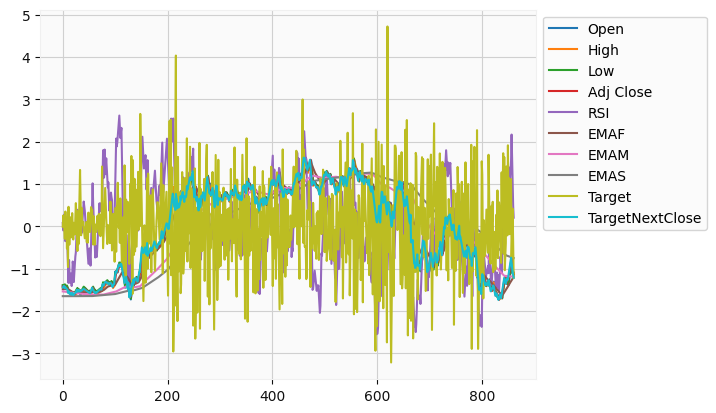

In [43]:
sc_train_df = pd.DataFrame(sc_train, columns = list(final_df))
sc_test_df = pd.DataFrame(sc_test, columns = list(final_df))
sc_train_df.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show()

# Predicting "TargetNextClose"

In [44]:
def x_y_split(df, n_target,  n_past=14):
 x = np.array([df.iloc[i-n_past:i,:8].copy() for i in range(n_past,len(df))])
 yi = np.array(df.iloc[n_past:,n_target])
 y=np.reshape(yi,(len(yi),1))
 return x,y

x_train, y_train = x_y_split(sc_train_df , -1, 14)  # -1 is for last column of the dataset which is 'TargetNextClose'
x_test, y_test = x_y_split(sc_test_df ,n_target= -1, n_past=14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((848, 14, 8), (202, 14, 8), (848, 1), (202, 1))

#**Model**

In [59]:
model =Sequential([
    LSTM(150, activation ='relu', input_shape = (x_train.shape[1],x_train.shape[2]),return_sequences= True),
    LSTM(32, activation ='relu', return_sequences = False),
    Dense(64, activation ='relu'),
    Dense(32, activation ='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation ='linear')
])
model.compile(optimizer ='adam', loss ='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 150)           95400     
                                                                 
 lstm_3 (LSTM)               (None, 32)                23424     
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 123049 (480.66 KB)
Trainable params: 123

In [60]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1,verbose=1)

Epoch 1/20
12/12 [==============================] - 5s 67ms/step - loss: 0.5292 - val_loss: 0.3737
Epoch 2/20
12/12 [==============================] - 0s 40ms/step - loss: 0.1500 - val_loss: 0.1669
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0985 - val_loss: 0.1768
Epoch 4/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0835 - val_loss: 0.0727
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.0785 - val_loss: 0.0856
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.0776 - val_loss: 0.1335
Epoch 7/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0679 - val_loss: 0.1030
Epoch 8/20
12/12 [==============================] - 0s 37ms/step - loss: 0.0709 - val_loss: 0.0959
Epoch 9/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0689 - val_loss: 0.1197
Epoch 10/20
12/12 [==============================] - 0s 38ms/step - loss: 0.0579 - val_loss: 0.1115
Epoch 11/

<Axes: >

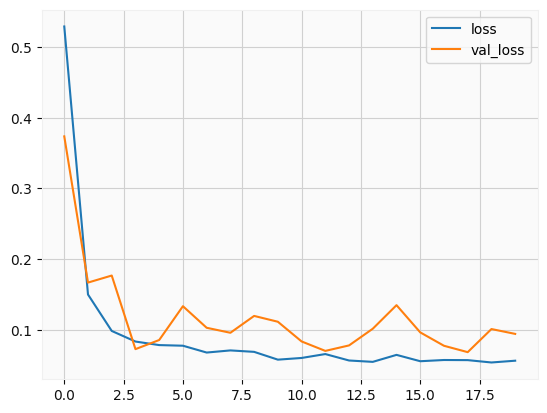

In [61]:
losses = pd.DataFrame(model.history.history)
losses.plot()

7/7 [==============================] - 0s 6ms/step
[-1.455197] [-1.66860962]
[-1.4952672] [-1.73584291]
[-1.4509317] [-1.74753547]
[-1.4385895] [-1.7259042]
[-1.4414196] [-1.8235384]
[-1.4414861] [-1.91240297]
[-1.4774373] [-1.81301493]
[-1.5391117] [-1.66977914]
[-1.5383203] [-1.59260713]
[-1.4574851] [-1.36810644]


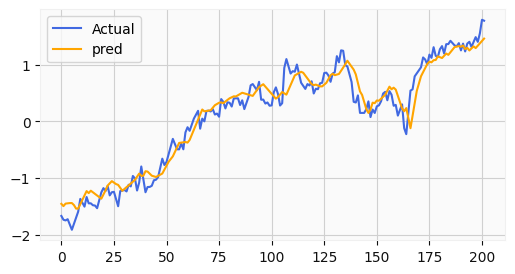

In [62]:
y_pred = model.predict(x_test)

for i in range(10):
  print(y_pred[i], y_test[i])
plt.figure(figsize=(6,3))
plt.plot(y_test, color = 'royalblue', label = 'Actual')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend()
plt.show()